Demographics of Americans Acquiring Debt


In [117]:
#Dependencies
import pandas as pd
import csv
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [98]:
#Load in file
loan_file = Path('Resources/loan_data_set.csv')

#Read and display the CSV with Pandas
loan_df = pd.read_csv(loan_file)

print(f"Number of rows in the DataFrame: {len(loan_df)}")
print("This dataset contains a sample of 615 people between ages 18 and 40. Demographics such as income and area of residency were gathered")
df.head()

Number of rows in the DataFrame: 614
This dataset contains a sample of 615 people between ages 18 and 40. Demographics such as income and area of residency were gathered


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,$128.00,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,$66.00,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,$120.00,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,$141.00,360.0,1.0,Urban,Y


In [99]:
#Remove columns with missing data
loan_df=df.dropna()
print("This new dataset has removed all samples with missing demographics")
loan_df.head()

This new dataset has removed all samples with missing demographics


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,$128.00,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,$66.00,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,$120.00,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,$141.00,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,$267.00,360.0,1.0,Urban,Y


In [100]:
#Create dataframe with only those that took loans 
borrowers = loan_df[loan_df.iloc[:,12] == "Y"]
borrowers.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,$66.00,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,$120.00,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,$141.00,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,$267.00,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,$95.00,360.0,1.0,Urban,Y


In [101]:
#Gather some statistics regarding borrowers incomes
max_income_borrowed = borrowers["Applicant_Income"].max()
median_income_borrowed =borrowers["Applicant_Income"].median()
min_income_borrowed = borrowers["Applicant_Income"].min()
acquirers_income = round(borrowers["Applicant_Income"].astype("float").mean(), 2)


print(f"The maximum income for those taking loans is {max_income_approved} ")
print(f"The median income for those taking loans is {median_income_approved} ")
print(f"The minimum income for those taking loans is {min_income_approved} ")
print(f"The Americans approved for loans are making an average of {acquirers_income} per month")

The maximum income for those taking loans is 39999 
The median income for those taking loans is 3858.5 
The minimum income for those taking loans is 645 
The Americans approved for loans are making an average of 5201.09 per month


In [102]:
count = borrowers["Loan_ID"].count()
count

332

In [103]:
#Create dataframe with only those not taking loans
non_borrowers = loan_df[loan_df.iloc[:,12] == "N"]
non_borrowers.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,$128.00,360.0,1.0,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,$158.00,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,$349.00,360.0,1.0,Semiurban,N
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,$114.00,360.0,1.0,Rural,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,$76.00,360.0,0.0,Urban,N


In [129]:
#Gather some statistics regarding non-borrowers incomes
max_income_nb = non_borrowers["Applicant_Income"].max()
median_income_nb = non_borrowers["Applicant_Income"].median()
min_income_nb = non_borrowers["Applicant_Income"].min()
nb_income = round(non_borrowers["Applicant_Income"].astype("float").mean(), 2)

print(f"The maximum income for those not taking loans is {max_income_nb} ")
print(f"The median income for those not taking loans is {median_income_nb} ")
print(f"The minimum income for those not taking loans is {min_income_nb} ")
print(f"The Americans not applying for loans are making an average of {nb_income} per month")

The maximum income for those not taking loans is 81000 
The median income for those not taking loans is 3871.0 
The minimum income for those not taking loans is 150 
The Americans not applying for loans are making an average of 5730.19 per month


In [105]:
count = non_borrowers["Loan_ID"].count()
count

148

In [106]:
#Count how many borrowers and non borrowers have a co-applicant
coapplicant_acquirers = loan_df[(loan_df["CoapplicantIncome"] >0)].count()["CoapplicantIncome"]
coapplicant_acquirers
print(f"{coapplicant_acquirers} applicants are applying with a co-applicant")

coapplicant_income=loan_df.groupby(["Loan_Status"]).mean()["CoapplicantIncome"]
coapplicant_income

264 applicants are applying with a co-applicant


Loan_Status
N    1773.081081
Y    1495.508795
Name: CoapplicantIncome, dtype: float64

<BarContainer object of 332 artists>

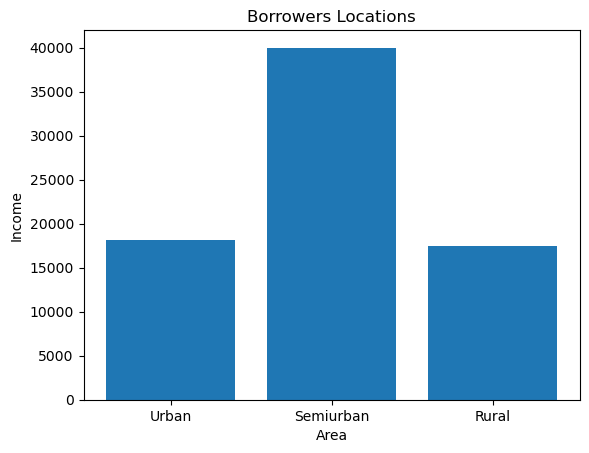

In [107]:
#Create a chart showing what area applicants reside
x_axis = borrowers["Property_Area"]
y_axis = borrowers["Applicant_Income"]
plt.title("Borrowers Locations")
plt.xlabel("Area")
plt.ylabel("Income")
plt.bar(x_axis,y_axis)

<BarContainer object of 148 artists>

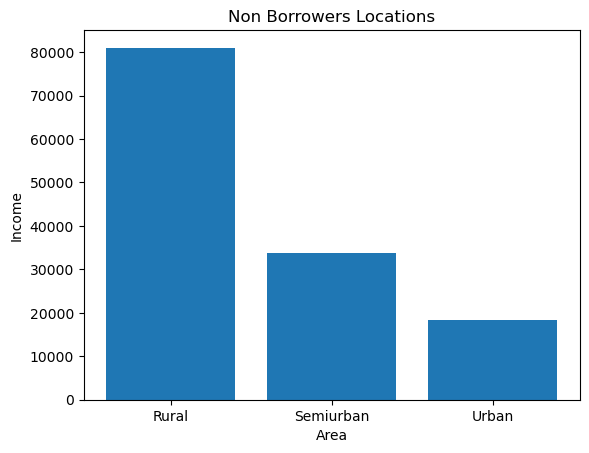

In [108]:
#Create a chart showing what area non-applicants reside
x_axis2 = non_borrowers["Property_Area"]
y_axis2 = non_borrowers["Applicant_Income"]

plt.title("Non Borrowers Locations")
plt.xlabel("Area")
plt.ylabel("Income")
plt.bar(x_axis2,y_axis2)

<IPython.core.display.Javascript object>


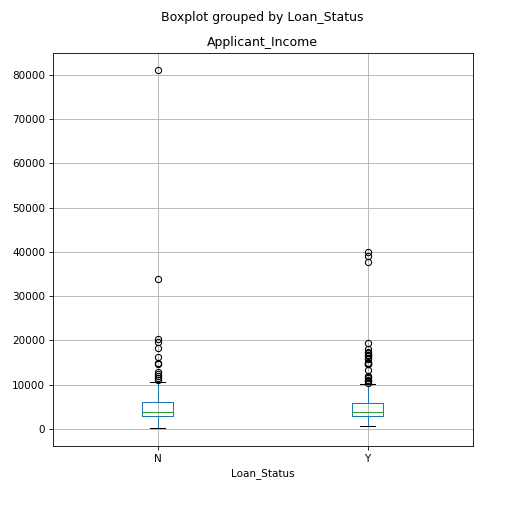

<AxesSubplot:title={'center':'Applicant_Income'}, xlabel='Loan_Status'>

In [139]:
loan_df.boxplot("Applicant_Income", by="Loan_Status", figsize=(7,7))

In [144]:
#Extract individual groups
group0 = loan_df[loan_df["Loan_Status"] == "Y"]["Applicant_Income"]
group1 = loan_df[loan_df["Loan_Status"] == "N"]["Applicant_Income"]

In [145]:
#Perform the ANOVA
stats.f_oneway(group0, group1)

F_onewayResult(statistic=0.8917248095740462, pvalue=0.34548738715838234)